# Checking Results

In [13]:
import pandas as pd
import pygmo as pg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [14]:
configs = pd.read_csv('./results_single_obj_dataset_1_3_2')

In [15]:
configs.head()

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,4.451697e+01,3.376603e+01,0.452692,31.417395,4.498260e+01,3.582575e+01,0.220194,35.027546,"{""num_rec"": 1, ""max_time"": 21, ""neuron_0"": 52,..."
1,5.027609e+18,5.129358e+16,-0.000104,0.478234,8.911778e+12,9.587084e+11,-0.011708,0.477456,"{""num_rec"": 1, ""max_time"": 31, ""neuron_0"": 24,..."
2,6.339256e+01,5.502479e+01,-24.935559,17.698952,5.865065e+01,5.049803e+01,-34.636255,17.572720,"{""num_rec"": 2, ""max_time"": 49, ""neuron_0"": 45,..."
3,7.057441e+13,9.082226e+11,-0.000166,0.345371,5.739125e+08,7.059962e+07,-0.015365,0.336246,"{""num_rec"": 1, ""max_time"": 42, ""neuron_0"": 75,..."
4,1.933318e+01,1.696654e+01,0.409240,12.142982,1.678654e+01,1.524582e+01,0.359147,12.132472,"{""num_rec"": 1, ""max_time"": 27, ""neuron_0"": 95,..."


In [16]:
configs.shape

(158, 9)

In [18]:
scaler = MinMaxScaler()
norm_cfgs = scaler.fit_transform(configs[['rmse_test', 'uncertainty_test']])

In [19]:
hyper_volume =[]
for i in range(norm_cfgs.shape[0]):
    hv = pg.hypervolume(norm_cfgs[:i+1])
    hyper_volume.append(hv.compute(ref_point=[1.1,1.1]))

hyper_volume = np.array(hyper_volume)

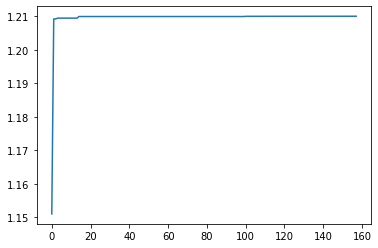

In [20]:
plt.plot(np.arange(hyper_volume.shape[0]), hyper_volume) 

In [27]:
pareto_index = pg.non_dominated_front_2d(configs[['rmse_test', 'uncertainty_test']]) 

In [28]:
pareto_configs = configs.iloc[pareto_index] 

In [29]:
pareto_configs

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
74,10.132338,4.493613,8.859653e-01,21.648808,7.147626,3.005642,8.955063e-01,22.436848,"{""num_rec"": 2, ""max_time"": 34, ""neuron_0"": 99,..."
9,11.638779,6.135546,8.747255e-01,13.744919,9.675685,5.200673,8.619642e-01,14.114239,"{""num_rec"": 1, ""max_time"": 33, ""neuron_0"": 37,..."
7,14.750334,7.978250,4.696588e-01,5.606514,9.685168,5.307231,6.898526e-01,5.519232,"{""num_rec"": 1, ""max_time"": 49, ""neuron_0"": 71,..."
117,33.098315,27.371759,-5.868046e+01,3.613033,28.559950,23.851663,-9.553102e+01,3.085927,"{""num_rec"": 3, ""max_time"": 46, ""neuron_0"": 78,..."
136,35.513706,29.735137,-1.156902e+11,0.000050,30.604070,26.287727,-5.153182e+29,0.000013,"{""num_rec"": 3, ""max_time"": 37, ""neuron_0"": 92,..."


(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

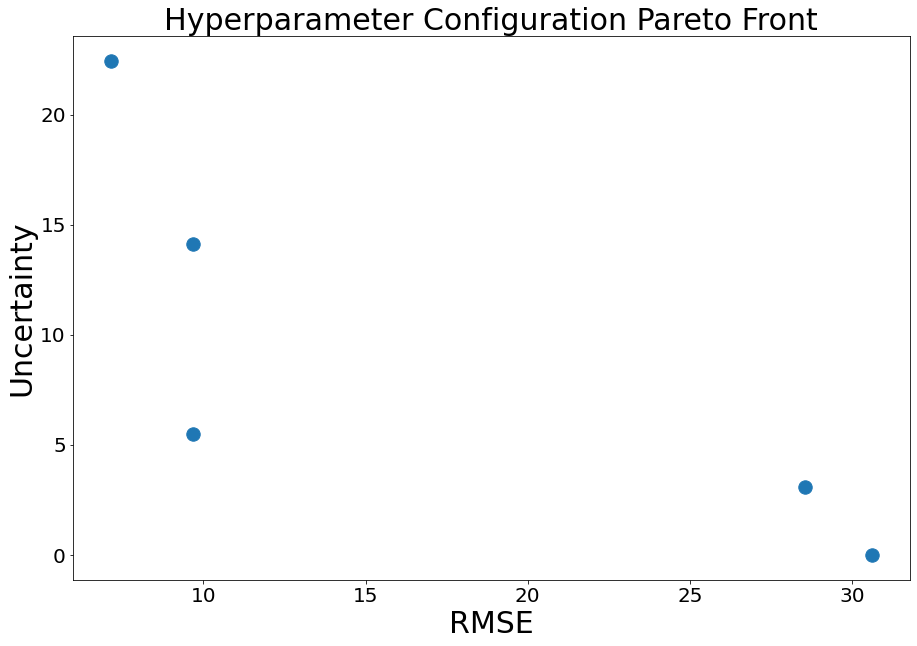

In [32]:
x = pareto_configs['rmse_test'].values
y = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
plt.scatter(x, y, s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configuration Pareto Front', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [35]:
HA_pareto = 2 / ( (1 / pareto_configs["rmse_test"]) + (1 / pareto_configs["uncertainty_test"]))

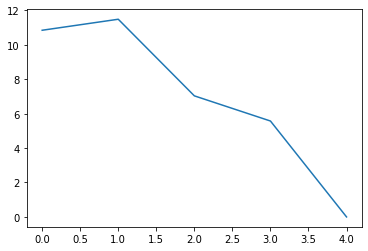

In [36]:
plt.plot(np.arange(HA_pareto.shape[0]), HA_pareto.to_numpy())

In [37]:
HA = 2 / ( (1 / configs["rmse_test"]) + (1 / configs["uncertainty_test"]))

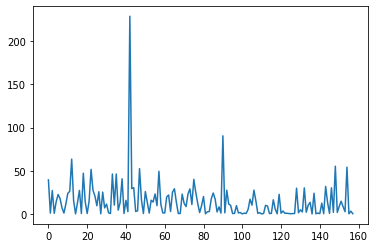

In [38]:
plt.plot(np.arange(HA.shape[0]), HA.to_numpy())

In [ ]:
plt.plot

In [17]:
id_min = configs.rmse_test.idxmin()
configs.iloc[id_min]

rmse_train                                                   10.132338
mae_train                                                     4.493613
r2_train                                                      0.885965
uncertainty_train                                            21.648808
rmse_test                                                     7.147626
mae_test                                                      3.005642
r2_test                                                       0.895506
uncertainty_test                                             22.436848
net_cfg              {"num_rec": 2, "max_time": 34, "neuron_0": 99,...
Name: 74, dtype: object

In [21]:
hyper_volume[-1]

1.2100000000000002

In [6]:
configs.sort_values(['rmse_test']).iloc[:20]

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
78,5.009311e+00,2.454884e+00,0.972050,22.094923,5.661908,2.394769,0.942034,24.676069,"{""num_rec"": 2, ""max_time"": 42, ""neuron_0"": 99,..."
81,6.998396e+00,4.518869e+00,0.955660,4.995081,6.330394,4.715301,0.939043,4.973808,"{""num_rec"": 2, ""max_time"": 45, ""neuron_0"": 76,..."
27,7.861868e+00,3.709804e+00,0.946831,28.610714,6.496275,2.611791,0.940652,28.519232,"{""num_rec"": 2, ""max_time"": 43, ""neuron_0"": 71,..."
241,6.201861e+00,4.008648e+00,0.959708,6.080430,7.059589,3.897983,0.904048,5.822139,"{""num_rec"": 2, ""max_time"": 33, ""neuron_0"": 99,..."
102,7.496025e+00,5.642598e+00,0.927124,9.089071,7.223661,5.532975,0.877539,8.831891,"{""num_rec"": 1, ""max_time"": 39, ""neuron_0"": 95,..."
103,6.011104e+00,3.128324e+00,0.969252,8.114623,7.500658,3.778154,0.926158,8.071624,"{""num_rec"": 2, ""max_time"": 29, ""neuron_0"": 48,..."
67,1.298597e+01,6.759508e+00,0.832422,20.451260,7.666909,3.964125,0.902125,21.993313,"{""num_rec"": 2, ""max_time"": 45, ""neuron_0"": 79,..."
164,8.577445e+00,7.397717e+00,0.887490,7.068459,7.743465,6.886144,0.845653,6.688490,"{""num_rec"": 2, ""max_time"": 38, ""neuron_0"": 81,..."
184,9.782560e+00,6.847101e+00,0.874806,3.600089,8.143084,5.786937,0.858706,3.064928,"{""num_rec"": 1, ""max_time"": 48, ""neuron_0"": 35,..."
169,1.759463e+03,9.204455e+01,-0.001240,10.293474,8.741982,4.260427,0.846518,9.723568,"{""num_rec"": 2, ""max_time"": 31, ""neuron_0"": 11,..."


In [8]:
configs.iloc[id_min].net_cfg

'{"num_rec": 2, "max_time": 42, "neuron_0": 99, "neuron_1": 17, "neuron_2": 49, "activation_rec_0": "sigmoid", "activation_rec_1": "tanh", "activation_rec_2": "tanh", "rec_dropout_norm_0": 0.22050755000000002, "rec_dropout_norm_1": 0.27450695, "rec_dropout_norm_2": 0.42750525, "recurrent_dropout_0": 0.34650615000000007, "recurrent_dropout_1": 0.68850235, "recurrent_dropout_2": 0.78750125, "final_activation_0": "softplus", "final_activation_1": "softplus", "percentage": 67, "rul": 111, "rul_style": "nonlinear", "lr": "1e-2", "batch": "32", "num_den": 1, "neuron_den_0": 76, "neuron_den_1": 48, "neuron_den_2": 47, "activation_den_0": "sigmoid", "activation_den_1": "tanh", "activation_den_2": "sigmoid", "dropout_0": 0.17550805000000003, "dropout_1": 0.50850435, "dropout_2": 0.38250575000000003}'

# Training full model on the best HP

In [24]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  # uncomment in case running ONLY on CPU is required

import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras import backend as k
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import History
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

from activations import Activate
from losses import CustomLoss
from preprocessing import build_data

import numpy as np
import pandas as pd
import math
from datetime import datetime

from sklearn import pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import json

In [25]:
net_cfg = {"num_rec": 2, "max_time": 42, "neuron_0": 99, "neuron_1": 17, "neuron_2": 49, "activation_rec_0": "sigmoid", "activation_rec_1": "tanh", "activation_rec_2": "tanh",
 "rec_dropout_norm_0": 0.22050755000000002, "rec_dropout_norm_1": 0.27450695, "rec_dropout_norm_2": 0.42750525, "recurrent_dropout_0": 0.34650615000000007, 
 "recurrent_dropout_1": 0.68850235, "recurrent_dropout_2": 0.78750125, "final_activation_0": "softplus", "final_activation_1": "softplus", "percentage": 67, "rul": 111,
  "rul_style": "nonlinear", "lr": "1e-2", "batch": "32", "num_den": 1, "neuron_den_0": 76, "neuron_den_1": 48, "neuron_den_2": 47, "activation_den_0": "sigmoid",
   "activation_den_1": "tanh", "activation_den_2": "sigmoid", "dropout_0": 0.17550805000000003, "dropout_1": 0.50850435, "dropout_2": 0.38250575000000003}

In [26]:
cfg = {'cv': 10, 'shuffle': True,
'random_state': 21,
'mask_value': -99,
'reps': 30,
'epochs': 20,
'batches': 64}

In [27]:
def weibull_mean(alpha, beta):
    return alpha * math.gamma(1 + 1/beta)

In [28]:
def network(train_X, train_y, net_cfg, cfg):
    k.set_epsilon(1e-10)
    strategy = tf.distribute.MirroredStrategy()

    history = History()
    nan_terminator = callbacks.TerminateOnNaN()
    reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss')
    early_stopping = callbacks.EarlyStopping(monitor='loss', patience=5)
    # checkpoint_filepath = './saved_models/cp-{epoch:04d}.ckpt'
    # checkpoint = callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='loss', verbose=1)
    # logdir="logs/test1" #+ datetime.now().strftime("%Y%m%d-%H%M%S")
    # tensorboard = callbacks.TensorBoard(log_dir=logdir)

    window = train_X.shape[1]
    n_features = train_X.shape[2]

    with strategy.scope():  # Create a MirroredStrategy.

        inputs = keras.Input(shape=(window, n_features))
        masking_layer = keras.layers.Masking(mask_value=cfg['mask_value'])(inputs)

        # recurrent layers
        last = 0
        if net_cfg["num_rec"] > 1:
            for i in np.arange(net_cfg["num_rec"] - 1):
                masking_layer = keras.layers.GRU(
                    net_cfg["neuron_" + str(i)],
                    activation=net_cfg["activation_rec_" + str(i)],
                    dropout=net_cfg["rec_dropout_norm_" + str(i)],
                    recurrent_dropout=net_cfg["recurrent_dropout_" + str(i)],
                    return_sequences=True,
                )(masking_layer)
            last = i + 1
            
        gru_last = keras.layers.GRU(
        net_cfg["neuron_" + str(last)],
        activation=net_cfg["activation_rec_" + str(last)],
        dropout=net_cfg["rec_dropout_norm_" + str(last)],
        recurrent_dropout=net_cfg["recurrent_dropout_" + str(last)],
        return_sequences=False,
        )(masking_layer)

        # dense layers
        last = 0
        if net_cfg["num_den"] > 1:
            for i in np.arange(net_cfg["num_den"] - 1):
                gru_last = keras.layers.Dense(
                net_cfg["neuron_den_" + str(i)],
                activation=net_cfg["activation_den_" + str(i)],
                )(gru_last)
                gru_last = keras.layers.Dropout(
                    rate=net_cfg["dropout_" + str(i)],
                )(gru_last)
            last = i + 1
     
        dense_ = keras.layers.Dense(2)(gru_last)
        custom_activation = Activate(net_cfg=net_cfg)
        outputs = keras.layers.Activation(custom_activation)(dense_)

        model = keras.Model(inputs=inputs, outputs=outputs, name="weibull_params")

        # rmse = tf.keras.metrics.RootMeanSquaredError()
        model.compile(loss=CustomLoss(kind='continuous', reduce_loss=True), optimizer=Adam(lr=eval(net_cfg['lr']),
                                                                                        clipvalue=0.5))
    model.summary()  # uncomment for debugging

    batch_size=eval(net_cfg['batch'])
    model.fit(train_X, train_y,
              epochs=cfg['epochs'],
              batch_size=eval(net_cfg['batch']),
              verbose=1,
              callbacks=[nan_terminator, history, reduce_lr, early_stopping],  #, checkpoint, tensorboard], 
              workers=32)

    return model, history



In [29]:
def load_data():

    np.random.seed(42)

    id_col = 'unit_number'
    time_col = 'time'
    feature_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3'] + ['sensor_measurement_{}'.format(x) for x in
                                                                       range(1, 22)]
    column_names = [id_col, time_col] + feature_cols

    train_x_orig = pd.read_csv('./DataSets/CMAPSS/train_FD001.csv', header=None, sep='\s+', decimal=".")
    train_x_orig.columns = column_names

    test_x_orig = pd.read_csv('./DataSets/CMAPSS/test_FD001.csv', header=None, sep='\s+', decimal=".")
    test_x_orig.columns = column_names

    test_y_orig = pd.read_csv('./DataSets/CMAPSS/RUL_FD001.csv', header=None, names=['T'])

    # Make engine numbers and days zero-indexed
    train_x_orig.iloc[:, 0:2] -= 1
    test_x_orig.iloc[:, 0:2] -= 1

    # Pre-processing data
    scaler = pipeline.Pipeline(steps=[
        ('minmax', MinMaxScaler(feature_range=(-1, 1))),
        ('remove_constant', VarianceThreshold())])

    train = train_x_orig.copy()
    train = np.concatenate([train[['unit_number', 'time']], scaler.fit_transform(train[feature_cols])], axis=1)

    train_x, train_y = build_data(units=train[:, 0], time=train[:, 1], x=train[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=False, mask_value=cfg['mask_value'],
                                    original_data=None, net_cfg = net_cfg, label=net_cfg['rul_style'])

    test_or = test_x_orig.copy()
    test_or = np.concatenate([test_or[['unit_number', 'time']], scaler.transform(test_or[feature_cols])], axis=1)


    # Preparing data for the RNN (numpy arrays)
    test_or, _ = build_data(units=test_or[:, 0], time=test_or[:, 1], x=test_or[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=True, mask_value=-99,
                                    original_data=np.repeat(200, test_or.shape[0]), net_cfg = net_cfg, label=net_cfg['rul_style'])

    

    return train_x, train_y, test_or, test_y_orig, train_x_orig


In [30]:
train_x, train_y, test_x, test_y, train_x_orig = load_data()


100%|██████████| 100/100 [00:00<00:00, 17633.50it/s]


In [31]:
print('train_x', train_x.shape, 'train_y', train_y.shape, 'test_x', test_x.shape, 'test_y', test_y.shape)


train_x (20631, 42, 17) train_y (20631, 1) test_x (100, 42, 17) test_y (100, 1)


In [32]:
model = tf.keras.models.load_model('./Final_experiments/dataset_1/SO/saved_models_14_1/cp-0041.ckpt/', custom_objects={"CustomLoss": CustomLoss, "Activate": Activate})

In [33]:
model.summary()

Model: "weibull_params"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 42, 17)]          0         
_________________________________________________________________
masking (Masking)            (None, 42, 17)            0         
_________________________________________________________________
gru (GRU)                    (None, 42, 99)            35046     
_________________________________________________________________
gru_1 (GRU)                  (None, 17)                6018      
_________________________________________________________________
dense (Dense)                (None, 2)                 36        
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
Total params: 41,100
Trainable params: 41,100
Non-trainable params: 0
________________________________________________

In [34]:
reps = 30
test_predict_1 = []
test_predict_2 = []
for i in range(cfg["reps"]):
    tf.random.set_seed(i)
    test_predict = model(test_x, training=True).numpy()
    test_predict_1.append(
        test_predict[:, 0].reshape(test_predict[:, 0].shape[0], 1)
    )
    test_predict_2.append(
        test_predict[:, 1].reshape(test_predict[:, 1].shape[0], 1)
    )

test_predict_1_median = np.median(np.hstack(test_predict_1), axis=1)
test_predict_2_median = np.median(np.hstack(test_predict_2), axis=1)
test_predict_1_median = test_predict_1_median.reshape(
    test_predict_1_median.shape[0], 1
)
test_predict_2_median = test_predict_2_median.reshape(
    test_predict_2_median.shape[0], 1
)
test_predict_1_std = np.std(np.hstack(test_predict_1), axis=1)
test_predict_2_std = np.std(np.hstack(test_predict_2), axis=1)
test_predict_1_std = test_predict_1_std.reshape(test_predict_1_std.shape[0], 1)
test_predict_2_std = test_predict_2_std.reshape(test_predict_2_std.shape[0], 1)

test_predict = np.hstack(
    [
        test_predict_1_median,
        test_predict_2_median,
        test_predict_1_std,
        test_predict_2_std,
    ]
)

test_predict = np.resize(
    test_predict, (test_x.shape[0], 4)
)  # changed from 2 to 4
test_result = np.concatenate((test_y, test_predict), axis=1)
test_results_df = pd.DataFrame(
    test_result,
    columns=["T", "median_alpha", "median_beta", "std_alpha", "std_beta"],
)

test_results_df["predicted_mu"] = test_results_df[
    ["median_alpha", "median_beta"]
].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
test_results_df["uncertainty"] = np.mean(test_predict[:, 2:], axis=1)

In [35]:
train_predict_1 = []
train_predict_2 = []

success = True

for i in range(cfg["reps"]):
    tf.random.set_seed(i)
    train_predict = model(train_x, training=True).numpy()
    train_predict_1.append(
        train_predict[:, 0].reshape(train_predict[:, 0].shape[0], 1)
    )
    train_predict_2.append(
        train_predict[:, 1].reshape(train_predict[:, 1].shape[0], 1)
    )

train_predict_1_median = np.median(np.hstack(train_predict_1), axis=1)
train_predict_2_median = np.median(np.hstack(train_predict_2), axis=1)
train_predict_1_median = train_predict_1_median.reshape(
    train_predict_1_median.shape[0], 1
)
train_predict_2_median = train_predict_2_median.reshape(
    train_predict_2_median.shape[0], 1
)
train_predict_1_std = np.std(np.hstack(train_predict_1), axis=1)
train_predict_2_std = np.std(np.hstack(train_predict_2), axis=1)
train_predict_1_std = train_predict_1_std.reshape(
    train_predict_1_std.shape[0], 1
)
train_predict_2_std = train_predict_2_std.reshape(
    train_predict_2_std.shape[0], 1
)

train_predict = np.hstack(
    [
        train_predict_1_median,
        train_predict_2_median,
        train_predict_1_std,
        train_predict_2_std,
    ]
)

train_predict = np.resize(train_predict, (train_x.shape[0], 4))
train_result = np.concatenate((train_y, train_predict), axis=1)
train_results_df = pd.DataFrame(
    train_result,
    columns=["T", "median_alpha", "median_beta", "std_alpha", "std_beta"],
)
train_results_df["unit_number"] = train_x_orig["unit_number"].to_numpy()
train_results_df["time"] = train_x_orig["time"].to_numpy()

train_results_df["predicted_mu"] = train_results_df[
    ["median_alpha", "median_beta"]
].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
train_results_df["uncertainty"] = np.mean(train_predict[:, 2:], axis=1)

In [36]:
columns = [
        "rmse_train",
        "mae_train",
        "r2_train",
        "uncertainty_train",
        "rmse_test",
        "mae_test",
        "r2_test",
        "uncertainty_test",
        "net_cfg",
    ]
results = pd.DataFrame(columns=columns)

rmse_train = []
r2_train = []
mae_train = []
std_train = []

rmse_test = []
r2_test = []
mae_test = []
std_test = []

In [37]:
# Performance evaluation
# train:
rmse_train.append(
    np.sqrt(
        mean_squared_error(
            train_results_df["predicted_mu"], train_results_df["T"]
        )
    )
)
mae_train.append(
    (
        mean_absolute_error(
            train_results_df["predicted_mu"], train_results_df["T"]
        )
    )
)
r2_train.append(
    r2_score(train_results_df["predicted_mu"], train_results_df["T"])
)
std_train.append(train_results_df["uncertainty"].mean())

# test:
rmse_test.append(
    np.sqrt(
        mean_squared_error(
            test_results_df["predicted_mu"], test_results_df["T"]
        )
    )
)
mae_test.append(
    (mean_absolute_error(test_results_df["predicted_mu"], test_results_df["T"]))
)
r2_test.append(r2_score(test_results_df["predicted_mu"], test_results_df["T"]))
std_test.append(test_results_df["uncertainty"].mean())

# registering results
results["rmse_train"] = rmse_train
results["mae_train"] = mae_train
results["r2_train"] = r2_train
results["uncertainty_train"] = std_train
results["rmse_test"] = rmse_test
results["mae_test"] = mae_test
results["r2_test"] = r2_test
results["uncertainty_test"] = std_test
results["net_cfg"] = json.dumps(net_cfg)

In [38]:
# Results=pd.concat([results187,results263, results101,results290,results267,results165])
# Results.to_csv('Final_experiments/dataset_1/Results', index=False)

In [39]:
Results = pd.read_csv('./Final_experiments/dataset_1/Results')

In [40]:
Results

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,7.089823,4.827719,0.951141,6.086137,20.734014,16.911902,0.635591,6.347113,"{""num_rec"": 2, ""max_time"": 30, ""neuron_0"": 84,..."
1,7.625503,4.684950,0.949609,6.977883,24.847671,20.523445,0.543277,8.512672,"{""num_rec"": 2, ""max_time"": 38, ""neuron_0"": 77,..."
2,12.279424,7.842011,0.841450,4.916361,26.824422,21.366423,0.314110,5.687934,"{""num_rec"": 1, ""max_time"": 24, ""neuron_0"": 72,..."
3,12.530787,7.848395,0.845866,4.207865,29.815131,23.915410,0.174613,4.906784,"{""num_rec"": 1, ""max_time"": 30, ""neuron_0"": 68,..."
4,18.283595,13.910402,0.711747,4.371925,20.790263,15.474533,0.636539,4.883142,"{""num_rec"": 1, ""max_time"": 38, ""neuron_0"": 49,..."
5,14.850582,10.765737,0.804497,6.377253,23.777367,18.717816,0.526813,7.591391,"{""num_rec"": 2, ""max_time"": 38, ""neuron_0"": 37,..."
6,25.633999,20.809390,0.415993,7.046897,23.775796,18.297404,0.524526,7.838632,"{""num_rec"": 2, ""max_time"": 24, ""neuron_0"": 79,..."


In [41]:
results

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,4.812325,2.510569,0.972241,22.818911,24.431929,21.076623,0.356192,25.995838,"{""num_rec"": 2, ""max_time"": 42, ""neuron_0"": 99,..."
